# Matplitlib

### 파이썬의 표준 시각화 도구

In [1]:
import pandas as pd
# 시각화 하려면 이게 필요함
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("../Data/시도별 전출입 인구수.xlsx")
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
df.tail()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,NaN,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [4]:
df.info()
# NaN이 없는줄 알았는데 다 object였네;;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    19 non-null     object
 1   전입지별    325 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    325 non-null    object
 17  1985    325 non-null    object
 18  1986    325 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [5]:
df[df['전출지별'].isnull()].head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,NaN,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138


### NaN 처리

In [6]:
# NaN을 전,근처값(Prev)로 채울수 있음. (ML 에서 KN?) => ffill(에프필)
# - 은 NaN 은 아님..
df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    325 non-null    object
 1   전입지별    325 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    325 non-null    object
 17  1985    325 non-null    object
 18  1986    325 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [8]:
# 서울에서 다른 지역으로 이동한 데이처만 추출하여 정리 
# 전출지별이 서울특별시이고 전입지병리 서울특별시가 아닌 곳
mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
mask
#df_seoul = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')


0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [45]:
df_seoul = df[mask]
len(df_seoul)

17

In [10]:
# 전출지별 컬럼 삭제 drop()
# df_seoul = df_seoul.iloc[:,1:]
# df_seoul.head()
df_seoul.drop(['전출지별'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
# 전입지별 -> 전입지 로 컬럽이름 변경
# df_seoul.rename(columns={'전입지별':'전입지'},inplace=True)
df_seoul.rename({'전입지별':'전입지'},axis =1 ,inplace=True)
df_seoul.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [12]:
# df_seoul의 index를 접입지로 변경
df_seoul.set_index('전입지', inplace = True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [13]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

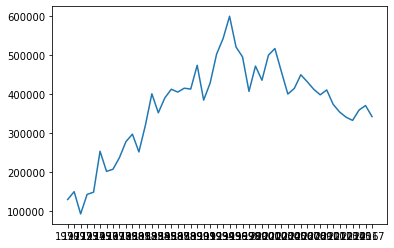

In [14]:
# 서울에서 경기도로 간사람
plt.plot(sr_one.index, sr_one.values)
plt.show()

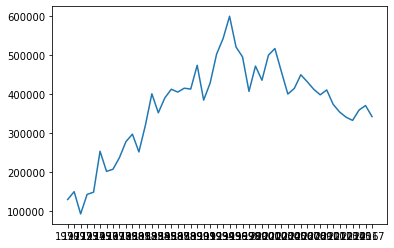

In [15]:
plt.plot(sr_one)
plt.show()

In [16]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

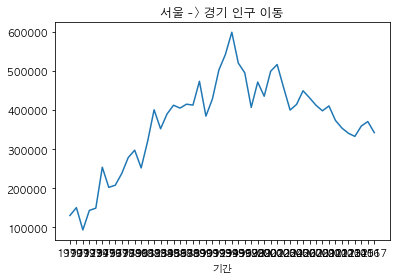

In [17]:
# 위에 뜨는 문구 없애는거
plt.show()

# 차트 제목 추가
plt.plot(sr_one)
plt.title("서울 -> 경기 인구 이동")

# 축이름 추가
plt.xlabel('기간')
plt.show()


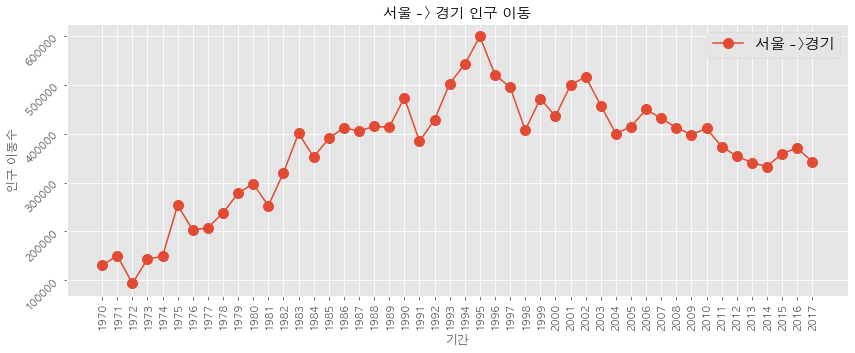

In [18]:
# 그래프 꾸미기

#Style 서식 지정
plt.style.use('ggplot') # 배경 그리드랑, 그래프 색 바뀜


# 그림 사이즈 지정(가로 14인치, 세로5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
# plt.xticks(rotation='vertical') #== plt.xticks(rotation=45)
plt.xticks(rotation=90)
# y축 눈금 라벨 회전하기
plt.yticks(rotation=45)

plt.title("서울 -> 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("인구 이동수")

#Marker 표시 marker="o" -> 점
plt.plot(sr_one, marker="o", markersize = 10)

#범례표시
plt.legend(labels = ['서울 ->경기'], loc = 'best', fontsize = 15)

#이미지 저장 *** 많이 사용!
plt.savefig('../Data/seoul.png')
plt.show()

# Style 추가해보기

In [19]:
# 쓸수있는 스타일 보기
# plt.style.available

# 스타일 사이트 참고!
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

# 옵션들 사용하는 방법 알려주는 사이트
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html

In [20]:
sr_one.shape

(48,)

### 문제
#### 부산 -> 서울 인구이동 그래프 그리기

In [21]:
# 부산에서 다른 지역으로 이동한 데이처만 추출하여 정리 
mask = (df['전출지별']=='부산광역시') & (df['전입지별'] != '부산광역시')
#mask
df_boo = df[mask]
len(df_boo)

# 전출지별 index 삭제
df_boo.drop(['전출지별'], axis=1, inplace=True)
df_boo.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
37,전국,376059,328367,319360,414661,554013,694445,629165,696120,782978,...,549106,549094,547800,532906,481652,496161,500802,520591,480407,467471
38,서울특별시,24263,30144,18260,24251,30284,59914,43416,42685,48142,...,25249,24459,23116,23016,21437,19621,20616,19441,19236,19460
40,대구광역시,-,-,-,-,-,-,-,-,-,...,4922,4785,5066,4981,5225,5027,5300,4553,4616,4506
41,인천광역시,-,-,-,-,-,-,-,-,-,...,3544,3236,3230,3741,3180,2986,3143,3185,3092,2994
42,광주광역시,-,-,-,-,-,-,-,-,-,...,1300,1244,1338,1329,1430,1047,1856,1195,1100,1073


In [22]:
# index 이름 바꾸고 index 바꿔주기
df_boo.rename({'전입지별':'전입지'},axis =1 ,inplace=True)
df_boo.set_index('전입지', inplace = True)
df_boo.head(2)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,376059,328367,319360,414661,554013,694445,629165,696120,782978,734053,...,549106,549094,547800,532906,481652,496161,500802,520591,480407,467471
서울특별시,24263,30144,18260,24251,30284,59914,43416,42685,48142,39673,...,25249,24459,23116,23016,21437,19621,20616,19441,19236,19460


In [23]:
# 부산에서 서울로 이동한 인구 데이터 값만 선택
bs_one = df_boo.loc['서울특별시']
bs_one.head()

1970    24263
1971    30144
1972    18260
1973    24251
1974    30284
Name: 서울특별시, dtype: object

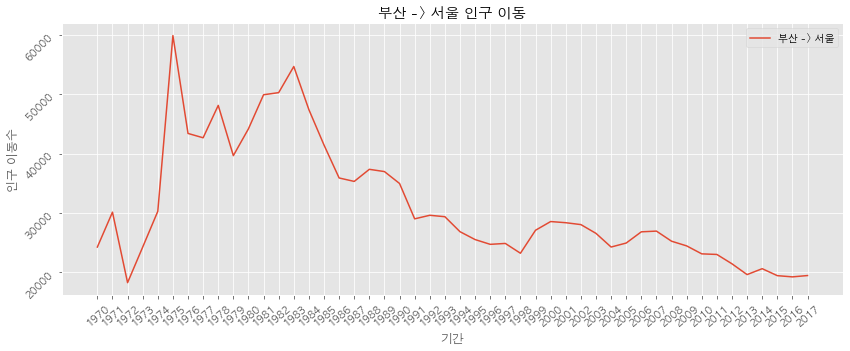

In [24]:
# 그래프 꾸미기
# 그림 사이즈 지정(가로 14인치, 세로5인치)
plt.figure(figsize=(14,5)) # 크기가 제일 먼저 있어야함 이건 고정!

# x축 눈금 라벨 회전하기
# plt.xticks(rotation='vertical') 
# plt.xticks(rotation=45)
plt.xticks(rotation=40)

# y축 눈금 라벨 회전하기
plt.yticks(rotation=45)

plt.title("부산 -> 서울 인구 이동")
plt.xlabel("기간")
plt.ylabel("인구 이동수")
plt.plot(bs_one) # 위치 조심! 

#범례표시
plt.legend(labels = ['부산 -> 서울'], loc = 'best')
plt.show()

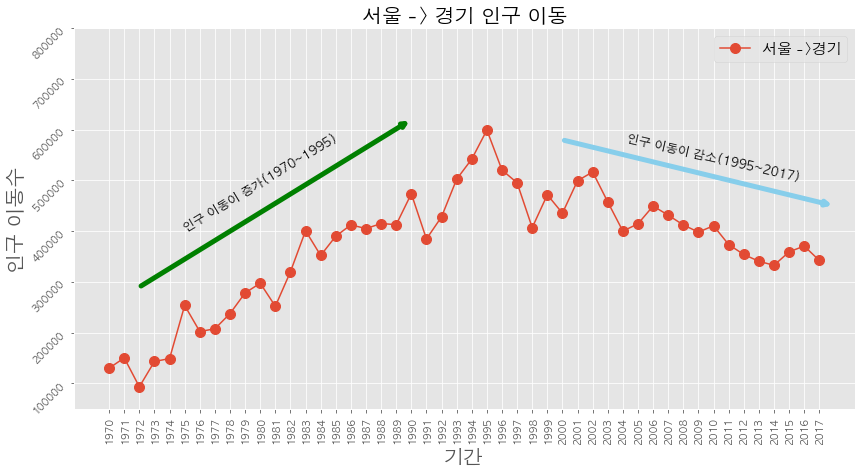

In [25]:
# 그래프 꾸미기

#Style 서식 지정
plt.style.use('ggplot') # 배경 그리드랑, 그래프 색 바뀜


# 그림 사이즈 지정(가로 14인치, 세로5인치)
plt.figure(figsize=(14,7))

# x축 눈금 라벨 회전하기
# plt.xticks(rotation='vertical') #== plt.xticks(rotation=45)
plt.xticks(rotation=90)
# y축 눈금 라벨 회전하기
plt.yticks(rotation=45)


#폰트 사이즈 size = 20
plt.title("서울 -> 경기 인구 이동", size = 20)
plt.xlabel("기간", size = 20)
plt.ylabel("인구 이동수", size = 20)

#Marker 표시 marker="o" -> 점
plt.plot(sr_one, marker="o", markersize = 10)

# y축 범위 지정 (최소값 , 최대값) R처럼 시작과 끝이 아님.
plt.ylim(50000, 800000)


#화살표 표시
plt.annotate('',#난 화살표야
            xy = (20,620000), # 화살표의 머리부분 (끝점)
            xytext=(2,290000), # 화살표의 꼬리부분 (시작점)
            # xycoords='data',# 3.7때까지는 썼었어. # 좌표 체계
            arrowprops=dict(arrowstyle='->', color='green', lw=5)
)
plt.annotate('인구 이동이 증가(1970~1995)',# 텍스트
            xy=(10,400000), # 텍스트 위치 기준점
            rotation=31, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 샹하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize=12 # 텍스트 크기
)   
#화살표 표시
plt.annotate('',#난 화살표야
            xy = (48,450000), # 화살표의 머리부분 (끝점)
            xytext=(30,580000), # 화살표의 꼬리부분 (시작점)
            # xycoords='data',# 3.7때까지는 썼었어. # 좌표 체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)
)

plt.annotate('인구 이동이 감소(1995~2017)',# 텍스트
            xy=(40,500000), # 텍스트 위치 기준점
            rotation=-13, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 샹하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize=12 # 텍스트 크기
)   

#범례표시
plt.legend(labels = ['서울 ->경기'], loc = 'best', fontsize = 15)

#이미지 저장 *** 많이 사용!
# plt.savefig('../Data/seoul.png')
plt.show()

## 화면을 분할하여 그래프 여러개 그리기

In [26]:
# Warning무시
import warnings
warnings.filterwarnings('ignore')

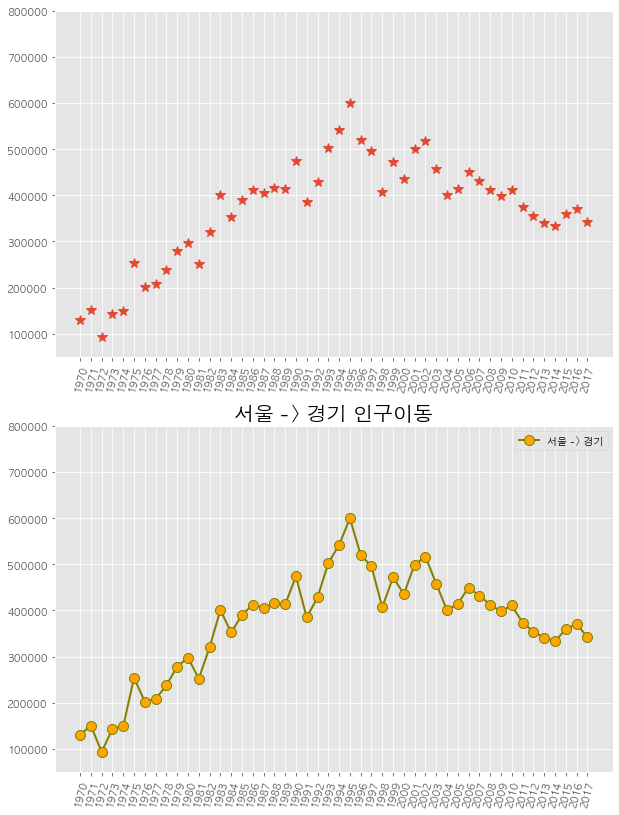

In [27]:
# 그래프 꾸미기

#Style 서식 지정
plt.style.use('ggplot') # 배경 그리드랑, 그래프 색 바뀜


#그래프 객체 생성(firure에 2개의 서브플롯을 생성)
fig = plt.figure(figsize=(10, 14))

# 그래프 위치 생성
ax1 = fig.add_subplot(2,1,1) # 2행 1열의 첫번째다.
ax2 = fig.add_subplot(2,1,2) # 2행 1열의 두번째다.
# ax1.plot(sr_one, 'o', markersize = 10)
# ax1.plot(sr_one, '^', markersize = 10)
# ax1.plot(sr_one, '|', markersize = 10)


ax1.plot(sr_one, '*', markersize = 10)
ax2.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, # o, *, +, |, ., ^//
                            #markerfacecolor='orange' 안에 들어가는 색깔
         color='olive' , linewidth=2, label='서울 -> 경기' # 범례에 쓰는 label  
         )
# 범례
ax2.legend(loc='best')
ax2.set_title("서울 -> 경기 인구이동", size = 20)

ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)


ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)


plt.show()

## 동일한 그림에 여러개의 그래프를 추가하기

In [28]:
# 서울에서 '충청남도','경상북도','강원도'로 이동한 인구데이터 값만 선택
df_3 = df_seoul.loc[['충청남도','경상북도','강원도']]
df_3 

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


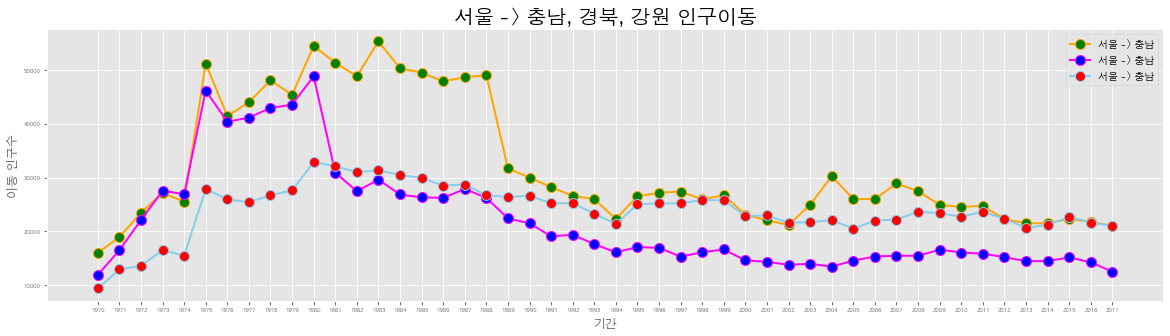

In [29]:
# Style
plt.style.use('ggplot')

fig=plt.figure(figsize=(20, 5))
# 하나쓰면 add_subplot
ax = fig.add_subplot(1, 1, 1)


ax.plot(df_3.columns, 
        df_3.loc['충청남도'],
        marker='o',
        markerfacecolor = 'green',
        markersize =10,
        color = 'orange',
        linewidth = 2,
        label = '서울 -> 충남'
        )

ax.plot(df_3.columns, 
        df_3.loc['경상북도'],
        marker='o',
        markerfacecolor = 'blue',
        markersize =10,
        color = 'magenta',
        linewidth = 2,
        label = '서울 -> 충남'
        )

ax.plot(df_3.columns, 
        df_3.loc['강원도'],
        marker='o',
        markerfacecolor = 'red',
        markersize =10,
        color = 'skyblue',
        linewidth = 2,
        label = '서울 -> 충남'
        )

        
ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경북, 강원 인구이동', size = 20)

ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)

plt.show()

In [30]:
df_3.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

### 문제

In [31]:
# 서울에서 '충청남도','경상북도','강원도'로 이동한 인구데이터 값만 선택
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도']]
df_4 

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


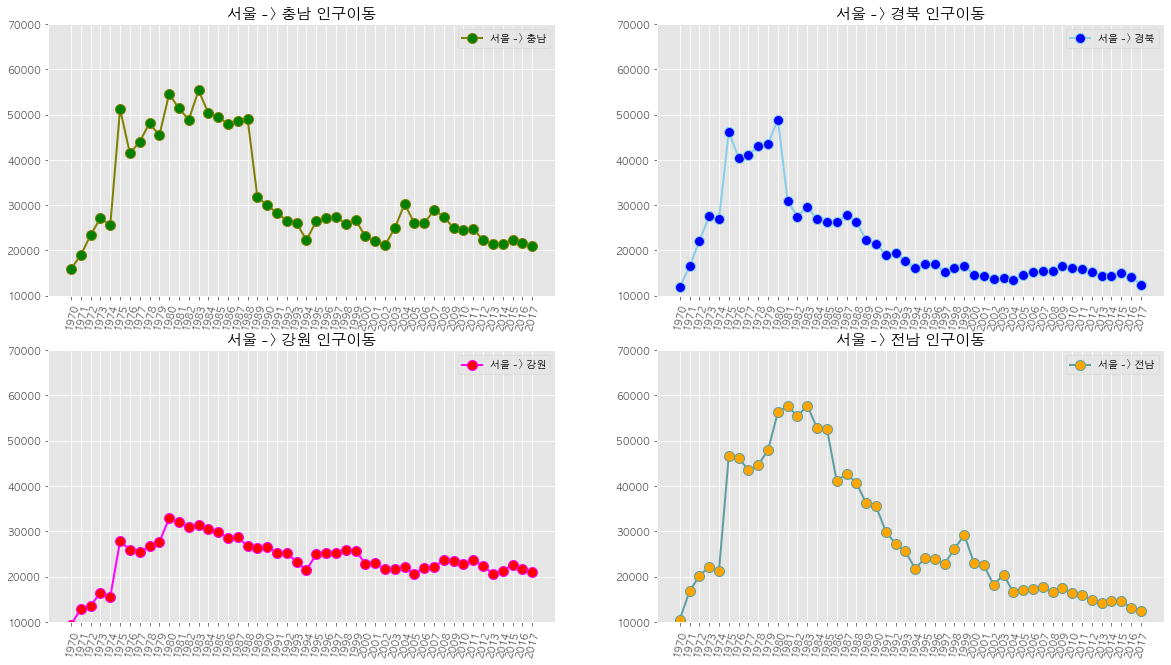

In [32]:
# 그래프 꾸미기

#Style 서식 지정
plt.style.use('ggplot') # 배경 그리드랑, 그래프 색 바뀜


#그래프 객체 생성(firure에 2개의 서브플롯을 생성)
fig = plt.figure(figsize=(20, 11))

# 그래프 위치 생성
ax1 = fig.add_subplot(2,2,1) # 2행 1열의 첫번째다.
ax2 = fig.add_subplot(2,2,2) # 2행 1열의 두번째다.
ax3 = fig.add_subplot(2,2,3) # 2행 2열의 첫번째다.
ax4 = fig.add_subplot(2,2,4) # 2행 2열의 두번째다.

ax1.plot(df_4.columns, 
        df_4.loc['충청남도'],
        marker='o',
        markerfacecolor = 'green',
        markersize =10,
        color = 'olive',
        linewidth = 2,
        label = '서울 -> 충남'
        )
ax2.plot(df_4.columns, 
        df_4.loc['경상북도'],
        marker='o',
        markerfacecolor = 'blue',
        markersize =10,
        color = 'skyblue',
        linewidth = 2,
        label = '서울 -> 경북'
        )
ax3.plot(df_4.columns, 
        df_4.loc['강원도'],
        marker='o',
        markerfacecolor = 'red',
        markersize =10,
        color = 'magenta',
        linewidth = 2,
        label = '서울 -> 강원'
        )
ax4.plot(df_4.columns, 
        df_4.loc['전라남도'],
        marker='o',
        markerfacecolor = 'orange',
        markersize =10,
        color = 'cadetblue',
        linewidth = 2,
        label = '서울 -> 전남'
        )

# 범례
ax1.legend(loc='best')
ax1.set_title("서울 -> 충남 인구이동", size =15)
ax2.legend(loc='best')
ax2.set_title("서울 -> 경북 인구이동", size = 15)
ax3.legend(loc='best')
ax3.set_title("서울 -> 강원 인구이동", size = 15)
ax4.legend(loc='best')
ax4.set_title("서울 -> 전남 인구이동", size = 15)

ax1.set_ylim(10000,70000)
ax2.set_ylim(10000,70000)
ax3.set_ylim(10000,70000)
ax4.set_ylim(10000,70000)

ax1.set_xticklabels(df_4.columns, rotation=75)
ax2.set_xticklabels(df_4.columns, rotation=75)
ax3.set_xticklabels(df_4.columns, rotation=75)
ax4.set_xticklabels(df_4.columns, rotation=75)


plt.show()

In [33]:
# matplotlib 에서 사용할수 있는 색의 종류

import matplotlib

colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex

print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

 ---
 ### 누적 Data가 겹치는 그래프

In [34]:
df_3.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


<AxesSubplot:>

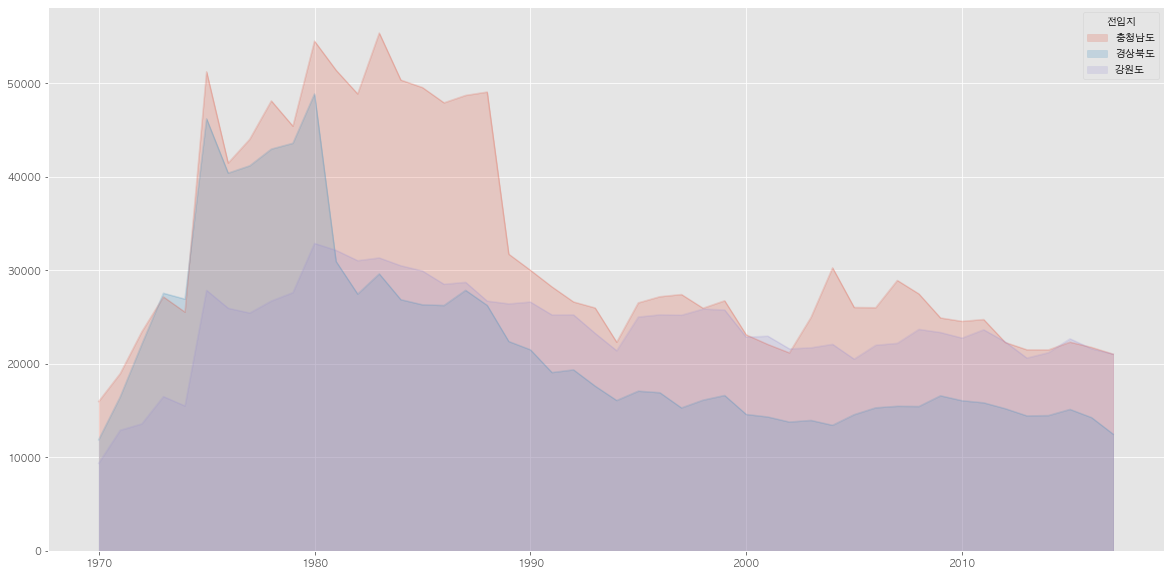

In [35]:
plt.style.use('ggplot')

df_3.T.plot(
    kind='area', 
    stacked=False, 
    alpha=0.2, 
    figsize=(20,10)
    )


#### 문제
- 서울 -> 타시도 인구 이동

Text(0, 0.5, '인구 이동수')

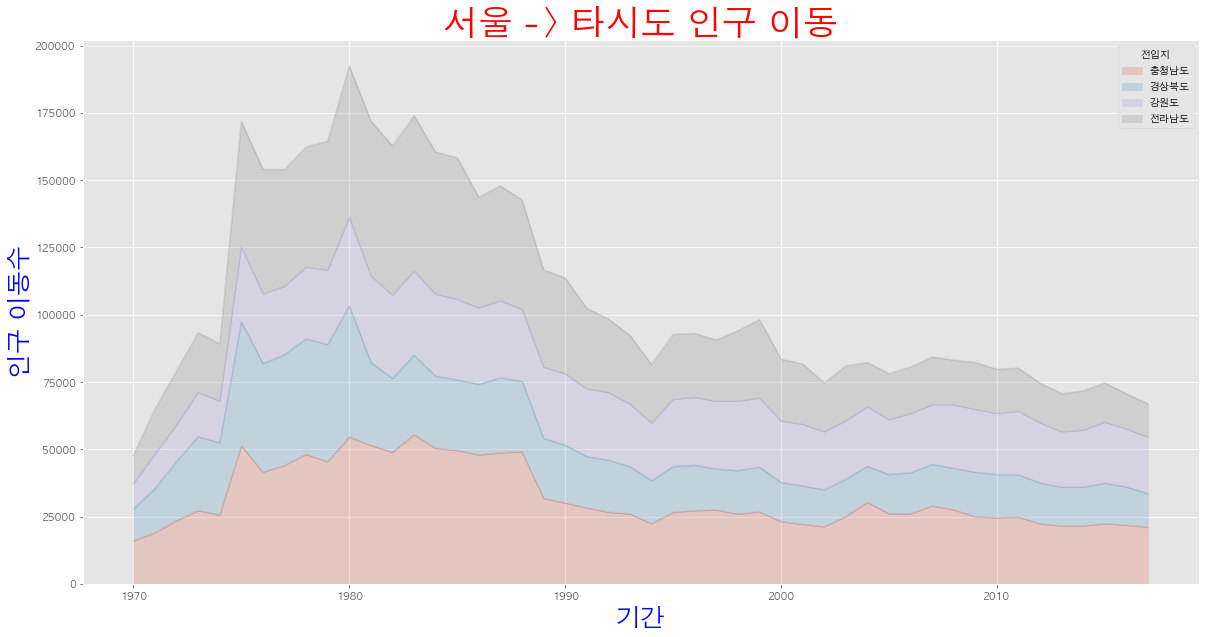

In [36]:
# 그래프 꾸미기

#Style 서식 지정
plt.style.use('ggplot') # 배경 그리드랑, 그래프 색 바뀜

df_4.T.plot(kind='area', 
            stacked=True, 
            alpha=0.2, 
            figsize=(20,10)
            )

plt.title('서울 -> 타시도 인구 이동', size = 35, color='red', weight = 'bold')

plt.xlabel("기간", size = 25, color = 'blue', weight = 'bold')
plt.ylabel("인구 이동수", size = 25, color = 'blue', weight = 'bold')


- 서울 <--> 부산 인구 이동 그리기

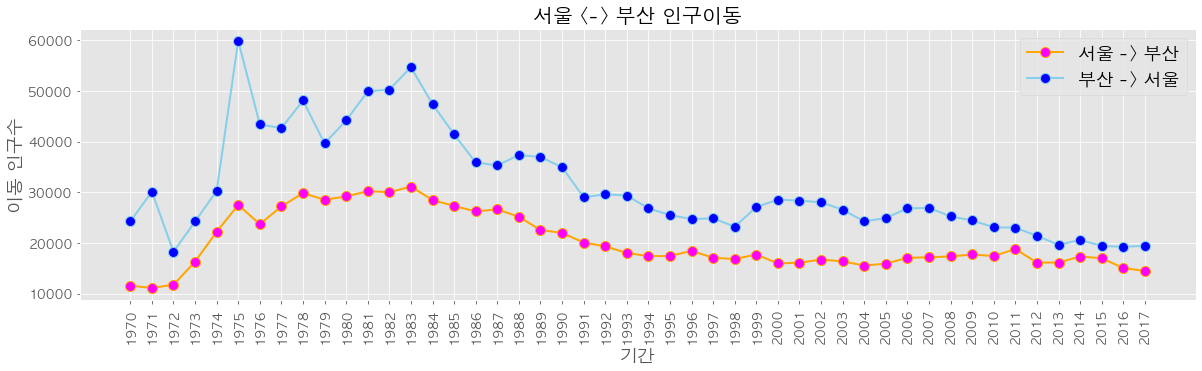

In [37]:
# Style
plt.style.use('ggplot')

fig=plt.figure(figsize=(20, 5))
# 하나쓰면 add_subplot
ax = fig.add_subplot(1, 1, 1)


ax.plot(df_seoul.columns, 
        df_seoul.loc['부산광역시'],
        marker='o',
        markerfacecolor = 'magenta',
        markersize =10,
        color = 'orange',
        linewidth = 2,
        label = '서울 -> 부산'
        )

ax.plot(bs_one,
        marker='o',
        markerfacecolor = 'blue',
        markersize =10,
        color = 'skyblue',
        linewidth = 2,
        label = '부산 -> 서울'
        )

# ax.xticks(rotation=90)

ax.legend(loc='best', fontsize = 18)
ax.set_title('서울 <-> 부산 인구이동', size = 20)

ax.set_xlabel('기간', size = 18)
ax.set_ylabel('이동 인구수', size = 18)

ax.tick_params(axis='x', labelsize=13, rotation=90)
ax.tick_params(axis='y', labelsize=13)

plt.show()

---
## 막대그래프

In [38]:
df_33 = df_3.T.loc['2000':]
df_33

전입지,충청남도,경상북도,강원도
2000,23083,14576,22832
2001,22056,14303,22941
2002,21155,13762,21582
2003,24942,13938,21696
2004,30246,13414,22071
2005,26012,14550,20483
2006,25986,15285,21969
2007,28898,15448,22177
2008,27458,15425,23668
2009,24889,16569,23331


<AxesSubplot:>

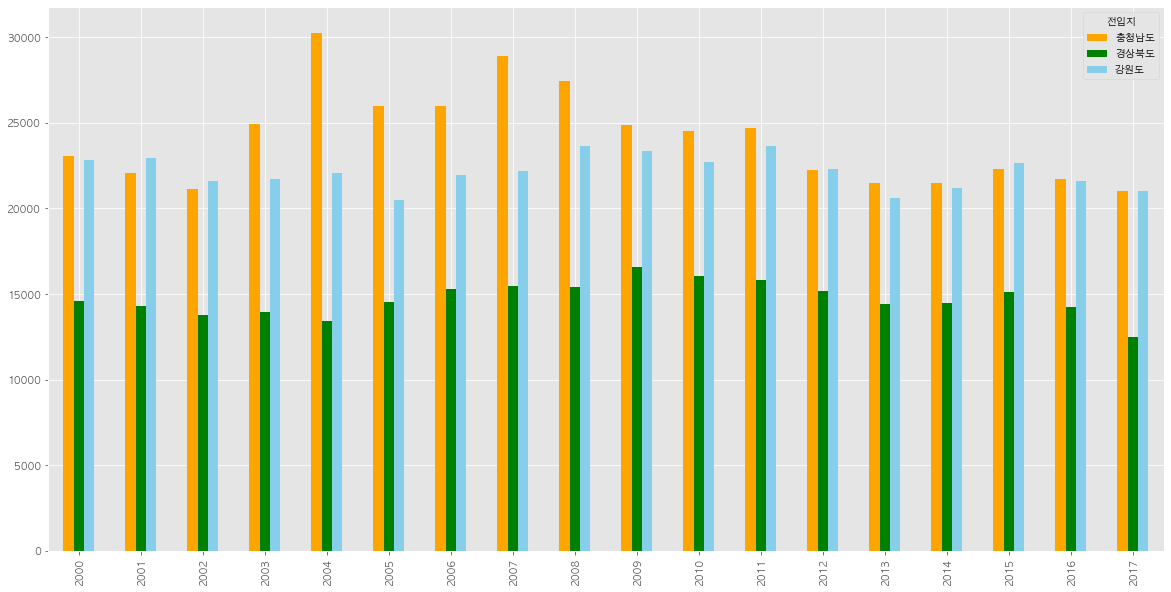

In [39]:
plt.style.use('ggplot')
df_33.plot(kind='bar',
        figsize = (20,10),
        color=['orange','green','skyblue']
)

### 2010 ~ 2017년의 기간동안 서울에서 각 시도로 이동한 인구의 합계를 구하여 그래프로 비교

In [40]:
# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구데이터 값만 선택
col_year = list(map(str, range(2010, 2018)))
df_5 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_year]
df_5

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [41]:
df_5['합계'] = df_4.sum(axis=1)
df_5

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,1529273.0
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,1052175.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,1146275.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,1381657.0


In [42]:
df_total = df_5[['합계']].sort_values(by='합계', ascending = True)
df_total

,합계
전입지,
경상북도,1052175.0
강원도,1146275.0
전라남도,1381657.0
충청남도,1529273.0


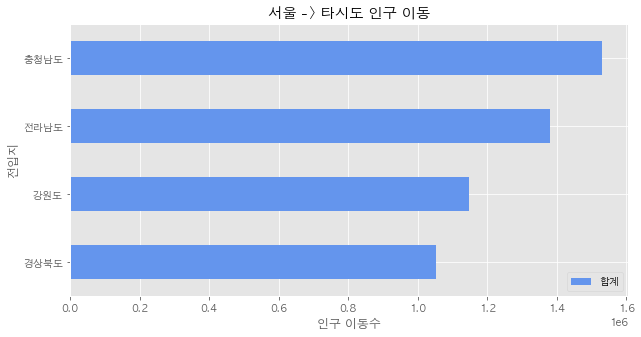

In [43]:
plt.style.use('ggplot')
df_total.plot(
                kind = 'barh', # bar뒤집은게 barh
                color='cornflowerblue',
                figsize=(10,5)
)

plt.title("서울 -> 타시도 인구 이동")
plt.ylabel('전입지')
plt.xlabel('인구 이동수')
plt.show()